Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

Reading Data

In [2]:
raw_data=pd.read_csv('house_prices.csv')
dataset=raw_data.copy()
dataset

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [3]:
dataset = dataset.drop("Unnamed: 0",axis=1)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


In [5]:
dataset.describe(include='all').style.background_gradient(cmap='tab20c')

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
count,99499,99499.000000,99499,99499,99499.000000,99499,99499.000000,99499.000000
unique,7,nan,1389,5,nan,2,nan,nan
top,House,nan,DHA Defence,Karachi,nan,For Sale,nan,nan
freq,58169,nan,11787,37066,nan,70947,nan,nan
mean,nan,10375919.495975,nan,nan,3.530106,nan,3.350737,8.757479
std,nan,10659998.262208,nan,nan,1.474217,nan,1.255913,7.466471
min,nan,15500.000000,nan,nan,1.000000,nan,0.000000,0.000000
25%,nan,150000.000000,nan,nan,2.000000,nan,2.000000,4.800000
50%,nan,7500000.000000,nan,nan,3.000000,nan,3.000000,6.700000
75%,nan,15500000.000000,nan,nan,5.000000,nan,4.000000,10.000000


Duplicated data

In [6]:
dataset.duplicated().count()

99499

In [7]:
dataset=dataset.drop_duplicates()

In [8]:
dataset.duplicated().count()

61641

Missing Value

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64


c:\Users\user\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])
c:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\user\anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: >

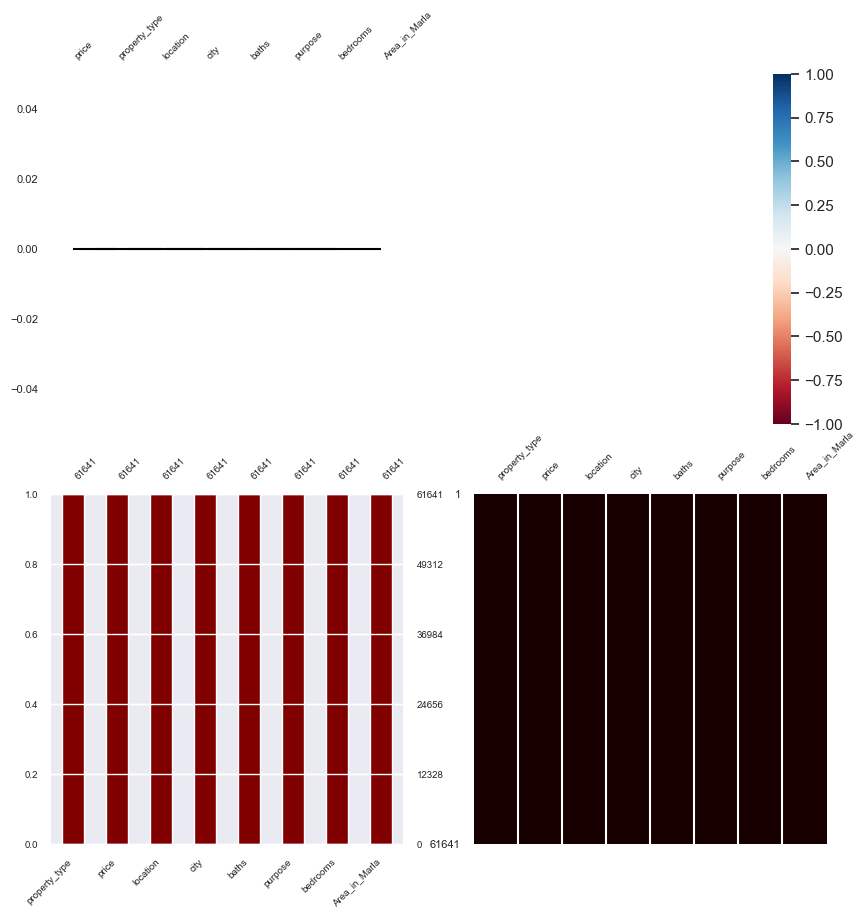

In [9]:
print(dataset.isnull().sum())
fig,axs=plt.subplots(2,2,figsize=(10,10))
ax=np.ravel(axs)
msno.dendrogram(dataset,ax=ax[0],fontsize=7)
msno.heatmap(dataset,ax=ax[1],fontsize=7)
msno.bar(dataset,ax=ax[2],fontsize=7,color=(0.5,0,0))
msno.matrix(dataset,ax=ax[3],fontsize=7,color=(0.1,0,0))

Visualizing

<Axes: xlabel='price', ylabel='Count'>

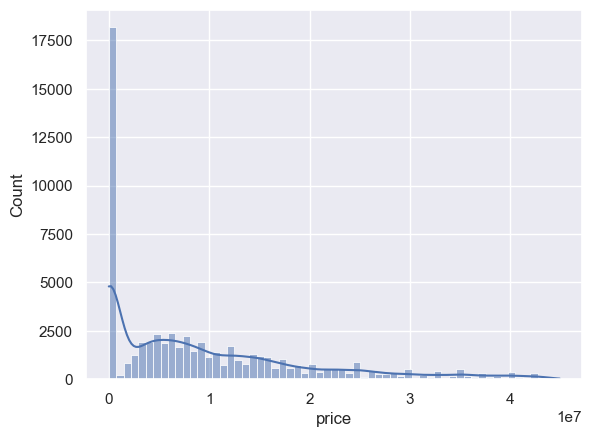

In [10]:
sns.histplot(dataset['price'],kde=True)

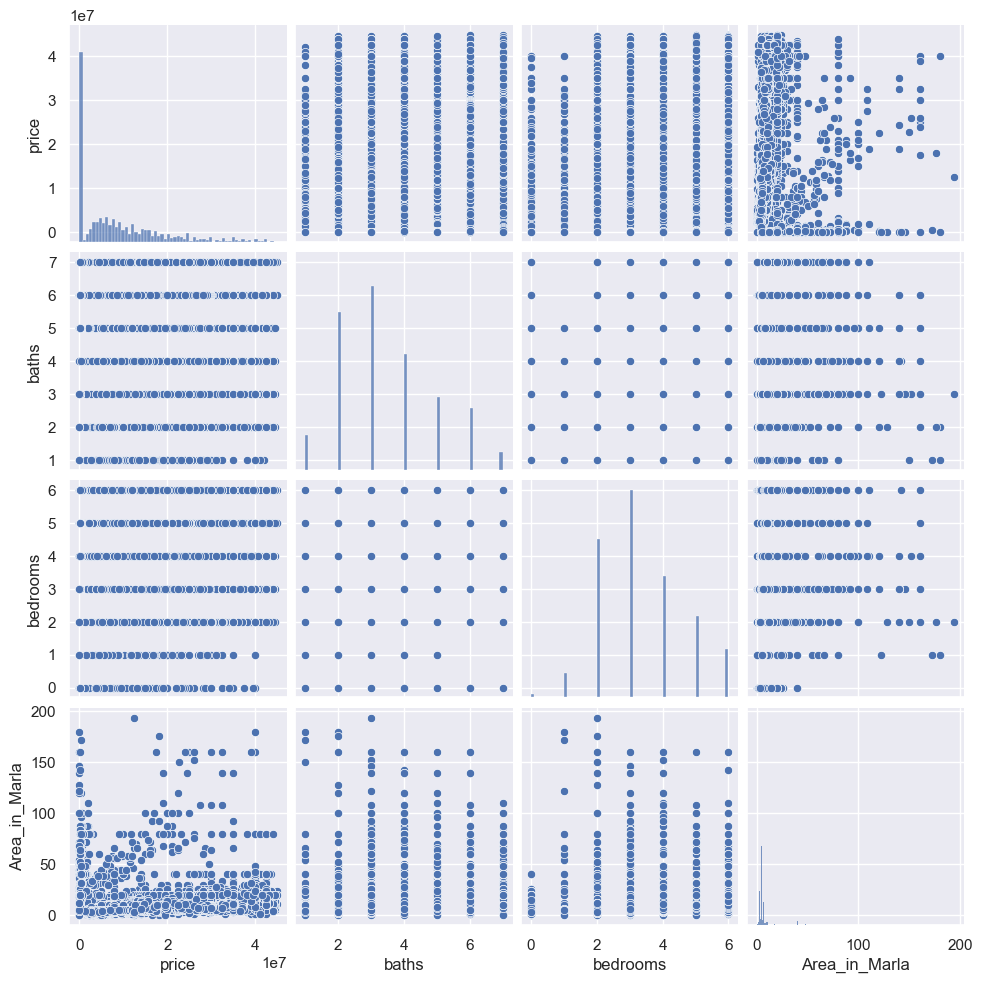

In [11]:
sns.pairplot(dataset)

C:\Users\user\AppData\Local\Temp\ipykernel_7180\3638506731.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

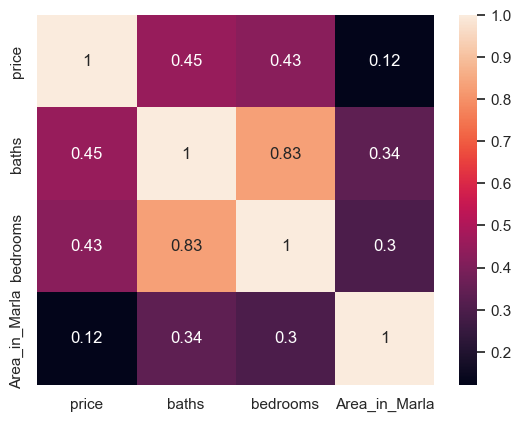

In [12]:
sns.heatmap(dataset.corr(),annot=True)


In [13]:
dataset

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
99457,House,40000000,DHA Defence,Lahore,6,For Sale,5,24.0
99470,Upper Portion,25000,Chak 208 Road,Faisalabad,2,For Rent,2,12.0
99477,House,41500000,NFC 1,Lahore,6,For Sale,5,20.0
99482,House,22500000,State Life Housing Society,Lahore,3,For Sale,3,10.0


In [14]:
numerical_data = dataset[['price', 'baths', 'bedrooms', 'Area_in_Marla']]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA(4)
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(len(numerical_data.columns))])
pca_df

,PC1,PC2,PC3,PC4
0,-1.362007,-0.391586,0.564578,0.019164
1,-0.567640,-0.153813,-0.130519,-0.020093
2,2.050016,-0.559138,-0.634156,0.340995
3,3.186449,1.622244,3.628116,-0.356771
4,-0.467387,0.095145,-0.009152,-0.032656
...,...,...,...,...
61636,3.665217,-0.009798,1.839835,0.182352
61637,-1.455291,0.939562,0.217507,0.011095
61638,3.567240,-0.505776,1.759082,0.197825
61639,0.255450,-0.447097,1.216085,-0.093688


Text(0.5, 0, 'Principal Component 3')

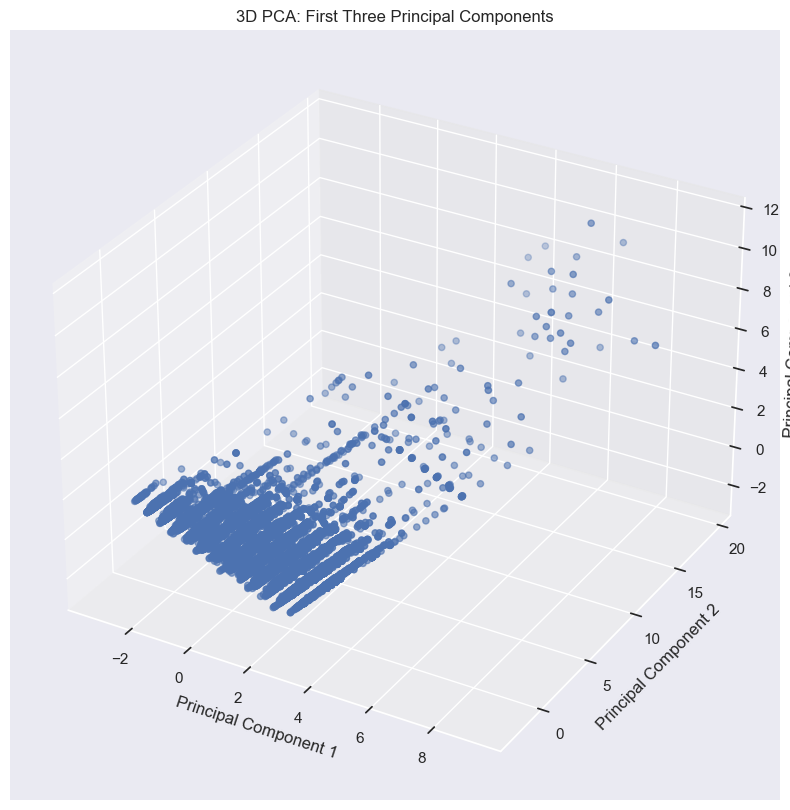

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

ax.set_title('3D PCA: First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


In [16]:
dataset_1 = pd.read_csv('house_prices.csv')


In [17]:
dataset_1.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [18]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_cols = ['price', 'baths', 'bedrooms', 'Area_in_Marla']
for col in numerical_cols:
    df_updated = remove_outliers(dataset_1, col)


object_ = ['property_type', 'city', 'purpose']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(dataset_1[object_])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(object_))
encoded_df
df_preprocessed = pd.concat([dataset_1, encoded_df], axis=1)

df_preprocessed.drop(columns=object_, inplace=True)

df_preprocessed.head() 



c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,price,location,baths,bedrooms,Area_in_Marla,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,0,10000000,G-10,2,2,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,6900000,E-11,3,3,5.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,16500000,G-15,6,5,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,43500000,Bani Gala,4,4,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,7000000,DHA Defence,3,3,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df_preprocessed_1 = df_preprocessed.copy()
df_preprocessed_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   99499 non-null  int64  
 1   price                        99499 non-null  int64  
 2   location                     99499 non-null  object 
 3   baths                        99499 non-null  int64  
 4   bedrooms                     99499 non-null  int64  
 5   Area_in_Marla                99499 non-null  float64
 6   property_type_Farm House     99499 non-null  float64
 7   property_type_Flat           99499 non-null  float64
 8   property_type_House          99499 non-null  float64
 9   property_type_Lower Portion  99499 non-null  float64
 10  property_type_Penthouse      99499 non-null  float64
 11  property_type_Room           99499 non-null  float64
 12  property_type_Upper Portion  99499 non-null  float64
 13  city_Faisalabad 

In [20]:
df_preprocessed_1=df_preprocessed_1.drop('location',axis=1)
df_preprocessed_1=df_preprocessed_1.drop('Unnamed: 0',axis=1)


In [21]:
df_preprocessed_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        99499 non-null  int64  
 1   baths                        99499 non-null  int64  
 2   bedrooms                     99499 non-null  int64  
 3   Area_in_Marla                99499 non-null  float64
 4   property_type_Farm House     99499 non-null  float64
 5   property_type_Flat           99499 non-null  float64
 6   property_type_House          99499 non-null  float64
 7   property_type_Lower Portion  99499 non-null  float64
 8   property_type_Penthouse      99499 non-null  float64
 9   property_type_Room           99499 non-null  float64
 10  property_type_Upper Portion  99499 non-null  float64
 11  city_Faisalabad              99499 non-null  float64
 12  city_Islamabad               99499 non-null  float64
 13  city_Karachi    

In [70]:
X = df_preprocessed_1.drop('price' , axis =1)
y = df_preprocessed_1['price']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_test.shape)

Shape of X_train:  (79599, 17)
Shape of X_eval:  (19900, 17)
Shape of y_train:  (79599,)
Shape of y_eval (19900,)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from lazypredict.Supervised import LazyRegressor
laz=LazyRegressor()
model,p=laz.fit(X_train , X_test , y_train , y_test )
model

 98%|█████████▊| 41/42 [22:42<01:01, 61.65s/it] 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 79599, number of used features: 17
[LightGBM] [Info] Start training from score 10342966.585259


100%|██████████| 42/42 [22:43<00:00, 32.47s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.85,0.85,4219934.56,0.43
LGBMRegressor,0.85,0.85,4229148.56,0.67
RandomForestRegressor,0.85,0.85,4235676.17,7.47
HistGradientBoostingRegressor,0.84,0.85,4244394.49,1.54
BaggingRegressor,0.84,0.84,4263220.46,1.11
ExtraTreesRegressor,0.84,0.84,4282068.99,9.36
DecisionTreeRegressor,0.84,0.84,4378083.60,0.23
ExtraTreeRegressor,0.83,0.83,4382910.42,0.15
KNeighborsRegressor,0.83,0.83,4460297.45,3.13


In [40]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_squared_error

In [31]:
reg1=RandomForestRegressor()
reg2=LGBMRegressor()
reg3=XGBRegressor()

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)


        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [35]:
stacked_averaged_models = StackingAveragedModels(base_models = (reg1,reg2),meta_model = reg3) 
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)
stacking_model.fit(X_train.values , y_train.values)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 63679, number of used features: 17
[LightGBM] [Info] Start training from score 10325624.719923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 63679, number of used features: 17
[LightGBM] [Info] Start training from score 10382594.736255
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

StackingAveragedModels(base_models=(RandomForestRegressor(), LGBMRegressor()),
                       meta_model=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

In [37]:
RandomForestRegressor_model=reg1.fit(X_train, y_train)
LGBMRegressor_model=reg2.fit(X_train, y_train)
XGBRegressor_model=reg3.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 79599, number of used features: 17
[LightGBM] [Info] Start training from score 10342966.585259


In [83]:
RandomForestRegressor_model_predict=RandomForestRegressor_model.predict(X_test_scaled)
LGBMRegressor_modell_predict=LGBMRegressor_model.predict(X_test_scaled)
XGBRegressor_model_predict=XGBRegressor_model.predict(X_test_scaled)
stacking_model_predict=stacking_model.predict(X_test_scaled)


In [84]:
# mse = XGBRegressor_model.evaluate(X_test_scaled, y_test)
RandomForestRegressor_model_predict_rmse = np.sqrt(mean_squared_error(y_test,RandomForestRegressor_model_predict))
LGBMRegressor_modell_predict_rmse = np.sqrt(mean_squared_error(y_test,LGBMRegressor_modell_predict))
XGBRegressor_model_predict_rmse = np.sqrt(mean_squared_error(y_test,XGBRegressor_model_predict))
stacking_model_predict_rmse = np.sqrt(mean_squared_error(y_test,stacking_model_predict))

print('RandomForestRegressor_model_predict_rmse Root Mean Squared Error:', RandomForestRegressor_model_predict_rmse)
print('LGBMRegressor_modell_predict_rmse Root Mean Squared Error:', LGBMRegressor_modell_predict_rmse)
print('XGBRegressor_model_predict_rmse Root Mean Squared Error:', XGBRegressor_model_predict_rmse)
print('stacking_model_predict_rmse Root Mean Squared Error:', stacking_model_predict_rmse)

RandomForestRegressor_model_predict_rmse Root Mean Squared Error: 12728107.220411694
LGBMRegressor_modell_predict_rmse Root Mean Squared Error: 13273109.973348867
XGBRegressor_model_predict_rmse Root Mean Squared Error: 13129930.391262284
stacking_model_predict_rmse Root Mean Squared Error: 12886421.427802613
